In [ ]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture3')      
except Exception:
  pass

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from IPython.display import clear_output
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# RGB and HSV colorspace
<div id="header">
  <img src="https://docs.opencv.org/3.4/Threshold_inRange_RGB_colorspace.jpg" width="400" height="300" alt="Image3" class="left" />
  <img src="https://docs.opencv.org/3.4/Threshold_inRange_HSV_colorspace.jpg" width="400" height="300" alt="Image1" class="right" />
</div>

# Color Filtering

In [2]:
rose = cv2.imread('data/blue_rose.jpg')[:,:,::-1]
rose_hsv = cv2.cvtColor(rose, cv2.COLOR_RGB2HSV) # convert the image from rgb to hsv. 
lower_bound = np.array([100,50,50]) # lower bound : h=101, s=50, v=50
upper_bound = np.array([130,255,255]) # upper bound : h=139, s=255, v=255
mask = cv2.inRange(rose_hsv, lower_bound, upper_bound)
res = cv2.bitwise_and(rose,rose, mask= mask)

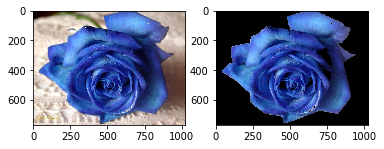

In [3]:
plt.figure()
plt.subplot(121)
plt.imshow(rose)
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.imshow(res)

## Color Filtering practice

### 2.1 Read image

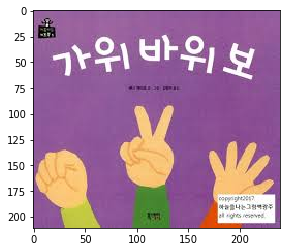

In [4]:
image_name = 'rock_scissors_paper.jpg' # put the name of a image you want to process
path = os.path.join('data/color_filter', image_name)
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)

### 2.2 Convert it into hsv color space and draw color histogram

<p align="center">
    <img src="https://github.com/hukim1112/DLCV_CLASS/blob/master/lecture3/img/HSV_color_solid_cone.png?raw=true" width=600></br>
</p>

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert the image from rgb to hsv.
print("shape of RGB : {} and shape of hsv : {}".format(img.shape, hsv.shape))

shape of RGB : (211, 239, 3) and shape of hsv : (211, 239, 3)


(0, 181)

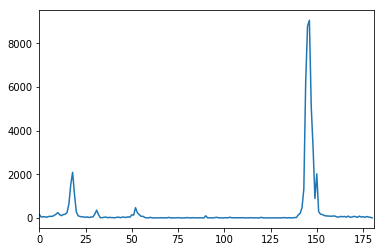

In [6]:
## gray scale hist 
hist = cv2.calcHist([hsv[:,:,0]], [0], mask = None, histSize = [181], ranges = [0, 181])
plt.plot(hist)
plt.xlim([0, 181])

### 2.3 Filtering out pixels on out of boundaries.

In [7]:
lower_bound = ?
upper_bound = ?
mask = cv2.inRange(hsv, lower_bound, upper_bound)
res = cv2.bitwise_and(img,img, mask= mask)

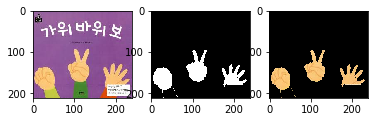

In [8]:
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.subplot(133)
plt.imshow(res, cmap='gray')
plt.show()

# 3. Convolutional Filtering

### 3.1 Bluring with average filter

In [ ]:
blur_mask = cv2.medianBlur(mask, 3)
plt.imshow(blur_mask, cmap='gray')

### Edge detection with Canny edge detecting algorithm(combination of two sobel filters)

In [ ]:
edge_mask = cv2.Canny(blur_mask, 30, 30*3)
plt.imshow(edge_mask, cmap='gray')

### FindContours algorithm

In [ ]:
contours, hierarchy = cv2.findContours(edge_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
plt.figure()
plt.subplot(221)
plt.imshow(cv2.drawContours(img.copy(), contours, 0, (0, 0, 0), 3))
plt.subplot(222)
plt.imshow(cv2.drawContours(img.copy(), contours, 1, (0, 0, 0), 3))
plt.subplot(223)
plt.imshow(cv2.drawContours(img.copy(), contours, 2, (0, 0, 0), 3))